In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from datetime import datetime, date, time
import seaborn as sns
import os
import pandas as pd
from scipy.stats import spearmanr
import scipy.stats

In [19]:
with open('/content/drive/MyDrive/bd_git/dataset.csv') as f:
    df = pd.read_csv(f, index_col=0)

Из графика ниже, можно сделать выводы, что признаки активных дней/месяцев/недель являются мультиколлинеарными. \
Также распределение всех признаков не является нормальныи

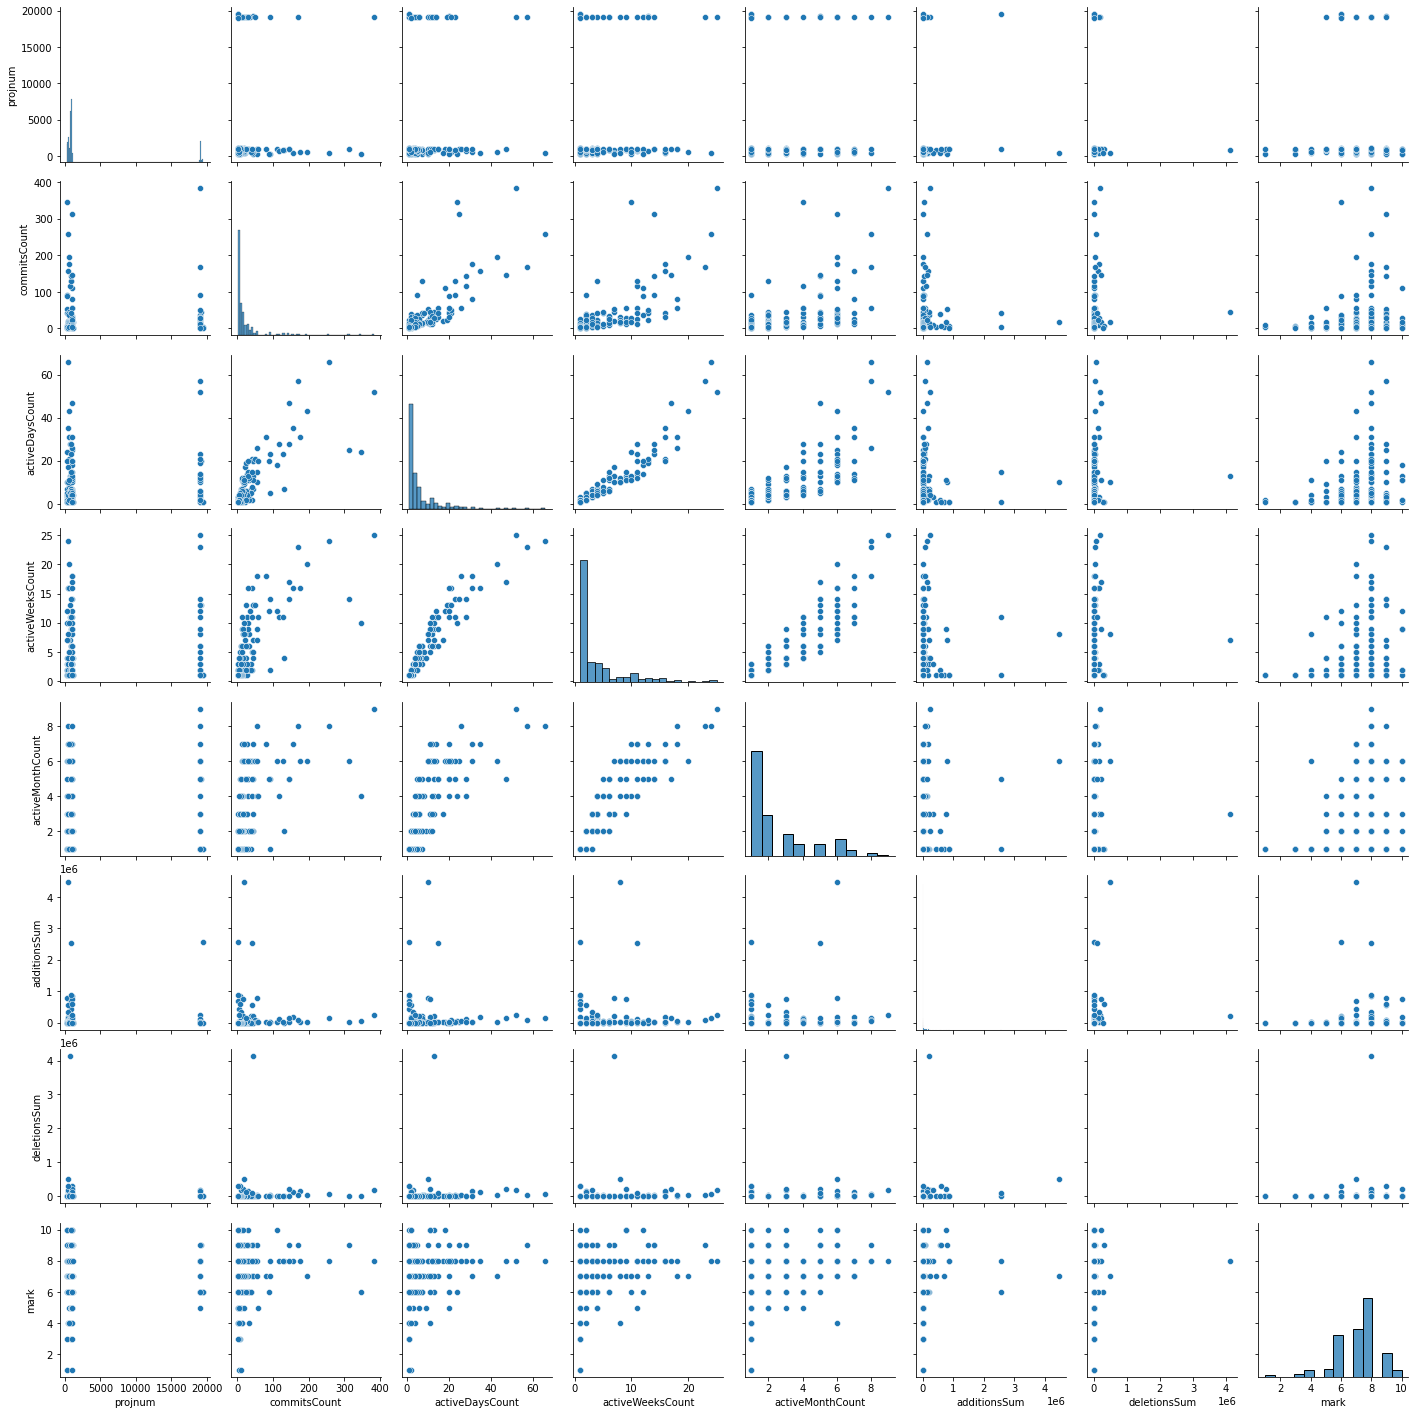

In [14]:
sns.pairplot(df)

Посчитаем значения корреляции Спирмана для каждого признака

In [36]:
df[['commitsСount', 'activeDaysCount', 'activeWeeksCount', 'activeMonthCount', 'additionsSum', 'deletionsSum', 'mark']].corr(method='spearman')['mark']

commitsСount        0.120810
activeDaysCount     0.210674
activeWeeksCount    0.233956
activeMonthCount    0.247382
additionsSum        0.192647
deletionsSum        0.197878
mark                1.000000
Name: mark, dtype: float64

Посчитаем pvalue для кажого значение, чтобы проверить статистическую значимость коэффициента корреляции

Начнем с признака commitsСount. Выдвигаем две гипотезы: \
H0 - различие между выборочным коэффициентом корреляции r и ρ = 0 незначимо \
H1 - различие между r и p=0 значимо, и следовательно, между переменными у и х имеется существенная связь. Из альтернативной гипотезы следует, что нужно воспользоваться двусторонней критической областью.

Коэффициент корреляции Спирмана имеет t-распределение, следовательно мы можем посчитать t-критерий стьюдента с f = n - 2 степенями свободы:

$$ \frac{r\sqrt{n - 2}}{1 - r^2} $$



$$t = \frac{0.12\sqrt{217 - 2}}{1 - 0.12^2} = 1.77$$

Cравнивается с критическим значением, определяемым по таблице распределения Стьюдента при заданном уровне значимости 0.05 и 215 степенях свободы получаем:

$$t_{кр} = 1,972 $$

$$|t| < t_{кр} $$

Поскольку наблюдаемое значение критерия не попало в критическую область, то следует принять нулевую гипотезу. Это означает, что коэффициент ранговой корреляции статистически не значим: между признаком commitsCount и целевой переменной в генеральной совокупности не имеется значимой связи, которая говорит о наличии связи этих двух случайных величин.

Визуализируем критическую область:

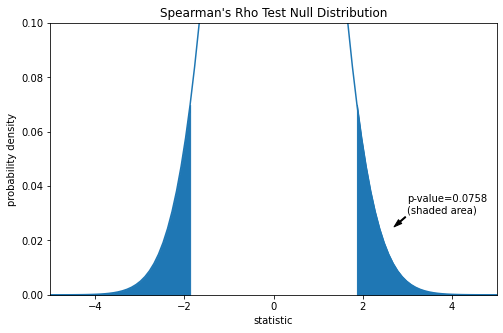

In [63]:
res = scipy.stats.spearmanr(df['commitsСount'], df['mark'])
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
rs = res[0] 
transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
pvalue = dist.cdf(-transformed) + dist.sf(transformed)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (2.7, 0.025), (3, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
i = t_vals <= -transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

Для облегчения подсчетов воспользуемся библиотекой SciPy и посчитаем pvalue для каждого признака

In [110]:
print('         Признак    ||  p(Признак, Оценка ||    pvalue         ||  Принимаемая гипотеза', end='\n\n')
features = df[['commitsСount', 'activeDaysCount', 'activeWeeksCount', 'activeMonthCount', 'additionsSum', 'deletionsSum']].columns
for column in features:
    print("%20s %20s %20s %10s"%(column, \
                                str(stats.spearmanr(features_df[column], df['mark'])[0]), \
                                str(stats.spearmanr(features_df[column], df['mark'])[1]), \
                                'H0' if stats.spearmanr(features_df[column], df['mark'])[1] > 0.05 else 'H1'))

         Признак    ||  p(Признак, Оценка ||    pvalue         ||  Принимаемая гипотеза

        commitsСount  0.12081002800888539  0.07575365006710223         H0
     activeDaysCount  0.21067373376619222 0.001804879608746255         H1
    activeWeeksCount  0.23395573244536463 0.0005111815933611718         H1
    activeMonthCount  0.24738243367048088 0.00023278199438664284         H1
        additionsSum   0.1926466099394333 0.004396735785184473         H1
        deletionsSum   0.1978782095358251 0.0034214882206128196         H1


Исходя из полученных выше результатов, можем сделать вывод, что итоговая оценка студента за проект зависит от следующих показателей: 
*   количество активных дней
*   количество активных недель
*   количество активных месяцев
*   количество добавленных строк
*   количестов удаленных строк






